# Sediment Settling

By Irina Overeem, September 2020


This notebook explores basic concepts of sediment settling in a fluid. 

We first look at the simplest case, Stokes Law, which defines the settling velocity of a spherical particle as proportional to its radius r^2. We will quickly learn that it is only applicable for very few natural grains (and even then is not so great). 
This notebook then explores sediment settling equations for larger grains, that take into account turbulence. 
A key paper by Ferguson and Church (2004) that lays out experiments and an empirical equations is associated with this notebook. 



*Topical Learning*: Sediment settling of different grainsizes

*Coding skills*: write a function, create an array, practice with plotting skills.



## Stokes Law

In the 19th century, George Stokes derived an expression that quantifies the drag force Fd – i.e. the frictional force - exerted on spherical objects settling under their own weight, Fg in a viscous fluid. 
Stokes' law was derived by solving the Stokes flow limit for small Reynolds numbers of the Navier–Stokes equations.

There are some really important assumptions that go into Stokes Law: 
1. the particle is spherical
2. the suspension is so dilute that there are no particle-particle interactions
3. the fluid flow is laminar, hence the small Reynolds number
4. the particles are so small that they reach terminal velocity before turbulence develops

Schematic of Stokes Settling (image courtesy Wikipedia)
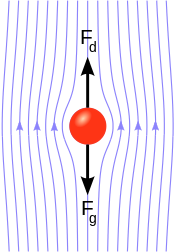

The upward drag force is defined as:
$Fd =6 \pi \mu r u$

wherein $\mu$ is the viscosity
and u  is the terminal velocity
<br>

The downward force of gravity is as follows:
<br>

$Fg = \frac{4}{3} \pi r^3 (\rho_g - \rho_f)g$

At terminal velocity, there is no acceleration anymore: 

$Fg = Fd $

Then you can backout the settling velocity, u, and replace r by particle diameter, D
<br>

$u = \frac {D^2 (\rho_g - \rho_f)g}{18\mu}$






In [7]:
# Import python libraries
# numpy handles arrays and matplotlib.pyplot and seaborn for plotting

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [8]:
# Define constants

rho_p = 2650.0 # density of particle in kg/m3, in this case it is silica
rho_f = 1000.0 # density of fluid in kg/m3, in this case it is water
mu = (1.0*1E-3) # dynamic viscosity in kg/m/s at 20 C
C1= 18 #constant in Stokes Settling law
C2 = 1 # constant in Ferguson-Church equation, shows up later in the notebook, valid for natural sand grains
g=9.81 # grav 

In [9]:
# Calculate the Stokes  settling velocity, u, for a single grain of silt (5*1E-06 m)

u_silt = ((0.000005**2)*(rho_p-rho_f)*g)/(C1*mu)
print(u_silt, 'm/s')

2.248125e-05 m/s


In [10]:
# relate the settling velocity to how long it would take a silt particle to settle in a lake of 3m depth
# time = distance/velocity
lake_depth=3
t = lake_depth/u_silt
print(t, 'in seconds', (t/(60*60)), 'in hours')

133444.53711426188 in seconds 37.067926976183855 in hours


## <font color = green> Assignment 1 </font> 
Can you do these calculation for a particle of clay?
How does the settling rate for the clay size particle compare to the silt size particle?

In [40]:
# your code or calculation for a clay size particle goes here

## <font color = green> Assignment 2 </font> 
Over the last decade, scientists and environmentalist have become much more aware of plastic particles in our waterways, lakes and oceans. Calculate the settling velocity of a silt-sized plastic particle. 

In [ ]:
# your code or calculation for a plastic particle goes here

## Write a Function for Stokes Settling Velocity

In programming, a _function_ is a set of statements that take inputs, do some specific computation and produces output. Sort of a mini-program. 
Functions serve to put commonly or repeatedly done tasks together and make a more general function, so that instead of writing the same code again and again for different inputs, we can "call" the function.
We do that here, so that you can repeat the Stokes settling veolocity calculations relatively quickly.

In [22]:
# define a function for calculating Stokes law 
def v_stokes(rho_p,rho_f,D,mu,C1):
        R = (rho_p-rho_f) # submerged specific gravity
        u = ((D**2)*R*g)/(C1*mu)
        return u

In [23]:
#create an array of increasing partical size diameters
# Approximate particle size of fine sand = 5*1E-5 m, silt 5*1E-6 m, clay 5*E-7

D = np.arange(0,0.0005,0.000001)

# you can always inquire attributes of the array. 
# Such as what is the shape, size or dimension of this array, or what datatypes it contains 
print(D.shape, D.size, D.ndim, D.dtype)

(501,) 501 1 float64


In [26]:
# now run the function over the entire array of particle sizes
u = v_stokes(rho_p,rho_f,D,mu,C1)

Text(0.5, 0, 'grainsize diameter in m')

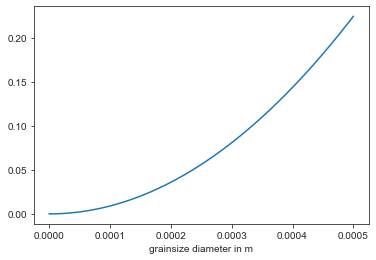

In [44]:
#plot settling velocity as a function of grain size diameter
plt.plot(D,u)
plt.xlabel('grainsize diameter in m')

## <font color = green> Assignment 3 </font> 
Add a few lines of code to the code-cell above to make this plot better.

1. Add a title.

2. Add a label and units along the y-axis.

3. Change the line color to be black.

##  Grain Settling for Pebbles and Cobbles

For grain sizes coarser than silt, settling is more complicated. The reason for this is the development of a separation wake behind the falling grain; the appearance of this wake results in turbulence and large pressure differences between the front and back of the particle. For larger grains - pebbles, cobbles - this effect is so strong that viscous forces become insignificant and turbulent drag dominates.  

Settling velocity can then be estimated using the empirical equation:

$w=\sqrt{\frac{4RgD}{3C_2}}$

R = specific submerged gravity (-)

$R = \frac{\rho_p-\rho_f}{\rho_f}$

## <font color = green> Assignment 4 </font> 
How does this settling rate equation compare to Stokes law? What is the main difference with respect to the diameter?

In [ ]:
# type your answer here

In [28]:
# here we write a function to describe the settling of much coarser particles 
def v_turbulent(rho_p,rho_f,d,mu,C2):
        R = (rho_p-rho_f)/rho_f 
        w = (4*R*9.81*d/(3*C2))**0.5
        return w

In [29]:
# again, use the numpy library to create an array for the grainsizes
d = np.arange(0,0.0005,0.000001)
ws = v_stokes(rho_p,rho_f,d,mu,C1)
wt = v_turbulent(rho_p,rho_f,d,mu,C2)

[0, 0.5, 0, 0.15]

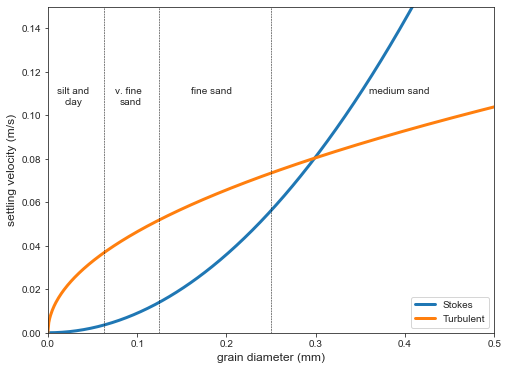

In [34]:
# here we make a prettier plot...showing off some bells and whistles of the seaborn library
plt.figure(figsize=(8,6))
sns.set_style("white")
sns.set_style("ticks")
plt.plot(d*1000,ws,label='Stokes',linewidth=3)
plt.plot(d*1000,wt,label='Turbulent',linewidth=3)
plt.plot([0.25, 0.25],[0, 0.15],'k--',linewidth=0.5)
plt.plot([0.25/2.0, 0.25/2.0],[0, 0.15],'k--',linewidth=0.5)
plt.plot([0.25/4.0, 0.25/4.0],[0, 0.15],'k--',linewidth=0.5)
plt.text(0.36, 0.11, 'medium sand', fontsize=10)
plt.text(0.16, 0.11, 'fine sand', fontsize=10)
plt.text(0.075, 0.11, 'v. fine', fontsize=10)
plt.text(0.08, 0.105, 'sand', fontsize=10)
plt.text(0.01, 0.11, 'silt and', fontsize=10)
plt.text(0.019, 0.105, 'clay', fontsize=10)
plt.legend(loc=4, fontsize=10)
plt.xlabel('grain diameter (mm)',fontsize=12)
plt.ylabel('settling velocity (m/s)',fontsize=12)
plt.axis([0,0.5,0,0.15])

## <font color = green> Assignment 3 </font> 
From reading this plot; what is the main difference between settling described by Stokes vs the empirical turbulent settling velicity?
Can you imagine real world environments that Stokes law still would be valid for? Research, and give an example.

In [ ]:
# type your answer here

## Grain settling for sand

So Stokes settling is appropriate for very small sediment grains, and for pebbles or cobbles we can ignore the viscous forces acting upon them because turbulent wake dominates. But what about the in-between grain sizes? 

Sand grains are small enough that viscous forces still play an important role in their settling behavior in a fluid, but large enough that the departure from Stokes’ Law is significant and wake turbulence cannot be ignored. 

There are several empiricalbut complicated equations that try to fill this intermediate zone. One relatively simple one captured sand grain settling rates from experiments well. It was published in 2004 in the Journal of Sedimentary Research (Ferguson and Church, 2004):

$w=\frac{RgD^2}{C1\nu+\sqrt{0.75C2RgD^3}}$


Ferguson, R. and Church, M. (2004) A simple universal equation for grain settling velocity. Journal of Sedimentary Research 74, 933–937, http://dx.doi.org/10.1306/051204740933.

In [39]:
# here we write a python function for Ferguson's settling rate equation

def v_ferg(rho_p,rho_f,d,mu,C1,C2):
        R = (rho_p-rho_f)/rho_f 
        w = (R*9.81*d**2)/(C1*mu/rho_f+(0.75*C2*R*9.81*d**3)**0.5)
        return w

In [37]:
# calculate the settling rate by the Ferguson approach

wf = v_ferg(rho_p,rho_f,d,mu,C1,C2)

[0, 0.5, 0, 0.15]

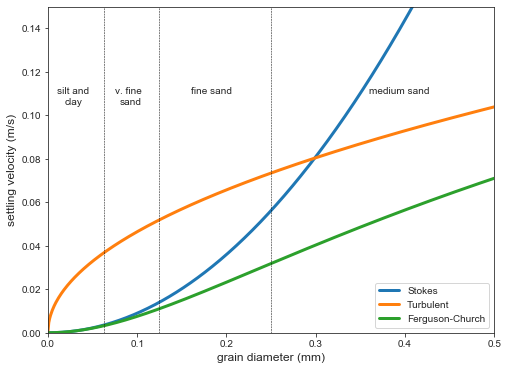

In [38]:
plt.figure(figsize=(8,6))
sns.set_style("white")
sns.set_style("ticks")
plt.plot(d*1000,ws,label='Stokes',linewidth=3)
plt.plot(d*1000,wt,label='Turbulent',linewidth=3)
plt.plot(d*1000,wf,label='Ferguson-Church',linewidth=3)
plt.plot([0.25, 0.25],[0, 0.15],'k--',linewidth=0.5)
plt.plot([0.25/2.0, 0.25/2.0],[0, 0.15],'k--',linewidth=0.5)
plt.plot([0.25/4.0, 0.25/4.0],[0, 0.15],'k--',linewidth=0.5)
plt.text(0.36, 0.11, 'medium sand', fontsize=10)
plt.text(0.16, 0.11, 'fine sand', fontsize=10)
plt.text(0.075, 0.11, 'v. fine', fontsize=10)
plt.text(0.08, 0.105, 'sand', fontsize=10)
plt.text(0.01, 0.11, 'silt and', fontsize=10)
plt.text(0.019, 0.105, 'clay', fontsize=10)
plt.legend(loc=4, fontsize=10)
plt.xlabel('grain diameter (mm)',fontsize=12)
plt.ylabel('settling velocity (m/s)',fontsize=12)
plt.axis([0,0.5,0,0.15])

## <font color = green> Assignment 4  </font> 
Find the Ferguson & Church paper (posted it for you on canvas). 
Look up settling data of natural river san grains in Table 2. 

Would the data for very fine sand still be adequately described by the Stokes law? 
How about medium sand?

In [ ]:
# type your answer here

## <font color = green> Bonus Assignment </font> 

Explore how settling velocity changes for different water temperatures. 


Create one plot showing Stokes settling velocity for clay grains in a range of water temperatures, 0deg C to 30 degC water, add a second line for  silt grains in 0deg C to 30 degC water.

Create another plot showing Ferguson settling velocity for silt grain settling velocity in 0deg C to 30 degC water, add a second line for medium sand grains.

In [ ]:
# your code goes here

## MADE IT! NICE WORK.